In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [6]:
cols=[var for var in df.columns if df[var].isnull().mean()*100 <5 and df[var].isnull().mean()*100 > 0]

In [7]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [77]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
15659,0.920,no_enrollment,Graduate,13.0,56.0
2236,0.698,no_enrollment,Masters,12.0,6.0
9873,0.878,no_enrollment,Masters,13.0,28.0
9149,0.624,Full time course,High School,1.0,9.0
14790,0.926,no_enrollment,Masters,15.0,77.0


In [78]:
drop_cols = df[cols].dropna()

In [48]:
[drop_cols.shape,df.shape]

[(17182, 5), (19158, 13)]

<Axes: >

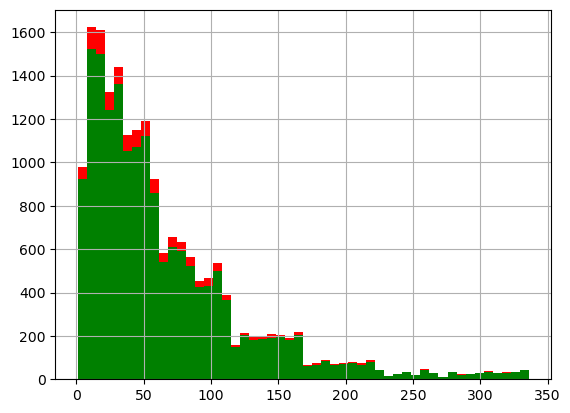

In [81]:
ax=plt.figure().add_subplot()
df['training_hours'].hist(bins=50,ax=ax,color='red')
drop_cols['training_hours'].hist(bins=50,ax=ax,color='green')

In [72]:
temp=pd.concat([df['enrolled_university'].value_counts()/len(df),drop_cols['enrolled_university'].value_counts()/len(df)],axis=1)
temp.columns=['original','cca']
temp

,original,cca
no_enrollment,0.721213,0.659359
Full time course,0.196106,0.180029
Part time course,0.062533,0.057469
